**Link:** https://colab.research.google.com/drive/1kisXfbJis8PenJHYxqg3YteLPr1MfltN?usp=sharing

#**Areofit Case Study**

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**About the Dataset:**

* **Product** : Product Purchased KP281, KP481, or KP781
* **Age** : In years
* **Gender** : Male/Female
* **Education** : in years
* **MaritalStatus** : single or partnered
* **Usage** : average number of times the customer plans to use the treadmill each week
* **Income** : annual income (in $)
* **Fitness** : self-rated fitness on a 1-to-5 scale, where 1 is poor shape and 5 is the excellent shape.
* **Miles** : average number of miles the customer expects to walk/run each week



In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

**The data type of all columns in the “customers” table.**

**You can find the number of rows and columns given in the dataset**

**Check for the missing values and find the number of missing values in each column**





In [128]:
areofit=pd.read_csv("/content/drive/MyDrive/aerofit_treadmill.csv")

In [129]:
df=areofit.copy()

In [130]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [131]:
df.shape

(180, 9)

In [132]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [134]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [135]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [136]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

#2. Detect Outliers

**Find the outliers for every continuous variable in the dataset**

**Remove/clip the data between the 5 percentile and 95 percentile**

**For Income column**

<Axes: ylabel='Income'>

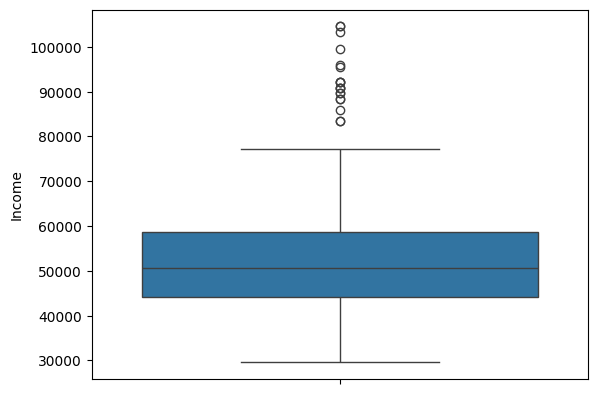

In [137]:
sns.boxplot(df['Income'])

In [138]:
five_percentile=np.percentile(df['Income'],5)
print(five_percentile)
ninety_percentile=np.percentile(df['Income'],95)
print(ninety_percentile)

34053.15
90948.24999999999


In [139]:
income_cliped_data=np.clip(df['Income'],five_percentile,ninety_percentile)
df['Income_cliped']=income_cliped_data

In [140]:
df[df['Income_cliped']<45000].groupby(['Product','Gender']).size()

Product  Gender
KP281    Female    17
         Male      17
KP481    Female     7
         Male       8
dtype: int64

In [141]:
df[df['Income_cliped']>=79000].groupby(['Product','Gender']).size()

Product  Gender
KP781    Female     3
         Male      16
dtype: int64

**Insights:**

* Users with  **more than 78000** as income has shown interest in **product KP781**



---



**For usage column**

<Axes: ylabel='Usage'>

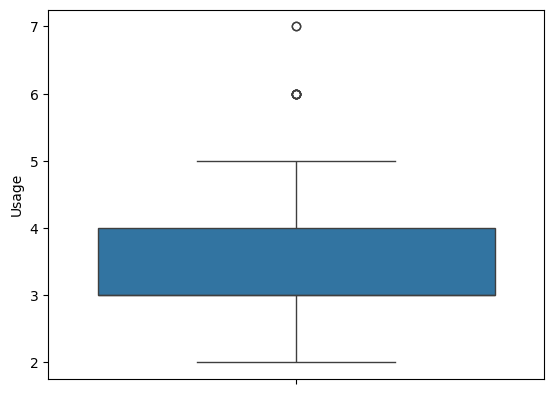

In [142]:
sns.boxplot(df['Usage'])

In [143]:
five_percentile=np.percentile(df['Usage'],5)
print(int(five_percentile))
ninety_percentile=np.percentile(df['Usage'],95)
print(int(ninety_percentile))
Usage_cliped_data=np.clip(df['Usage'],five_percentile,ninety_percentile)

2
5


In [144]:
df['Usage_cliped']=Usage_cliped_data
df[df['Usage_cliped']==5].groupby(['Product']).size()

Product
KP281     2
KP481     3
KP781    12
dtype: int64

In [145]:
df[df['Usage_cliped']<=3].groupby(['Product']).size()

Product
KP281    56
KP481    45
KP781     1
dtype: int64

**Insights:**

* Individuals who utilize equipment **five or more times per week** tend to prefer **KP781**.

* For individuals who use equipment **three times a week**, product models **KP281** and **KP481** are often preferred.




---



**For Education column**

<Axes: ylabel='Education'>

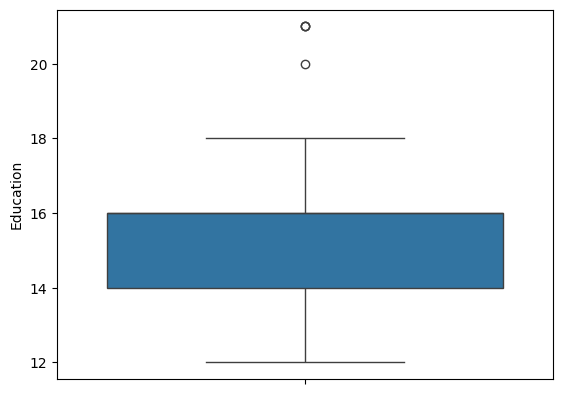

In [146]:
sns.boxplot(df['Education'])

In [147]:
five_percentile=np.percentile(df['Education'],5)
print(int(five_percentile))
ninety_percentile=np.percentile(df['Education'],95)
print(int(ninety_percentile))
Education_cliped_data=np.clip(df['Education'],five_percentile,ninety_percentile)

14
18


In [148]:
df['Education_cliped']=Education_cliped_data
df[df['Education_cliped']>=18].groupby(['Product']).size()

Product
KP281     2
KP481     2
KP781    23
dtype: int64

**Insights:**

* Individuals with an education level **above 18 years** tend to prefer product **KP781**.




---



**For Miles column**

<Axes: ylabel='Miles'>

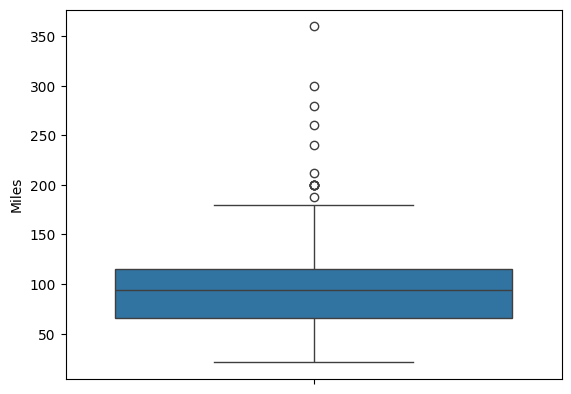

In [149]:
sns.boxplot(df['Miles'])

In [150]:
five_percentile=np.percentile(df['Miles'],5)
print(int(five_percentile))
ninety_percentile=np.percentile(df['Miles'],95)
print(int(ninety_percentile))
Miles_cliped_data=np.clip(df['Miles'],five_percentile,ninety_percentile)

47
200


In [151]:
df['Miles_cliped']=Miles_cliped_data
df[df['Miles_cliped']>=200].groupby(['Product']).size()

Product
KP481     1
KP781    11
dtype: int64

In [152]:
df[df['Miles_cliped']<=47].groupby(['Product']).size()

Product
KP281    12
KP481     5
dtype: int64

**Insights:**

* Individuals who typically cover an average of **more than 200 miles per week** tend to prefer using **KP781**.






---



**For Age column**

<Axes: ylabel='Age'>

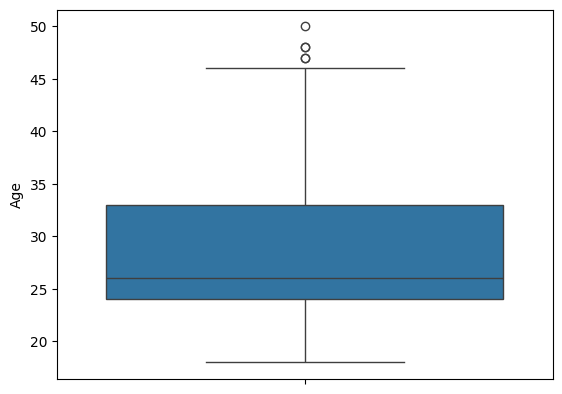

In [153]:
sns.boxplot(df['Age'])

In [154]:
five_percentile=np.percentile(df['Age'],5)
print(int(five_percentile))
ninety_percentile=np.percentile(df['Age'],95)
print(int(ninety_percentile))
Age_cliped_data=np.clip(df['Age'],five_percentile,ninety_percentile)

20
43


In [155]:
df['Age_cliped']=Age_cliped_data
df[df['Age_cliped']>=43].groupby(['Product']).size()

Product
KP281    5
KP481    2
KP781    3
dtype: int64

In [156]:
df[df['Age_cliped']<=20].groupby(['Product']).size()

Product
KP281    6
KP481    4
dtype: int64

#3. Check if features like marital status, Gender, and age have any effect on the product purchased

##Find if there is any relationship between the categorical variables and the output variable in the data.

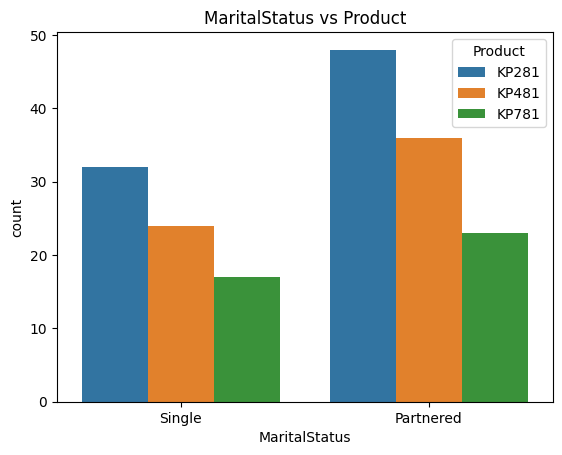

In [157]:
sns.countplot(x=df['MaritalStatus'],hue=df['Product'])
plt.title('MaritalStatus vs Product')
plt.show()

**Insights:**

* Both **single and partnered users** predominantly prefer **KP281**, followed by **KP481** products.




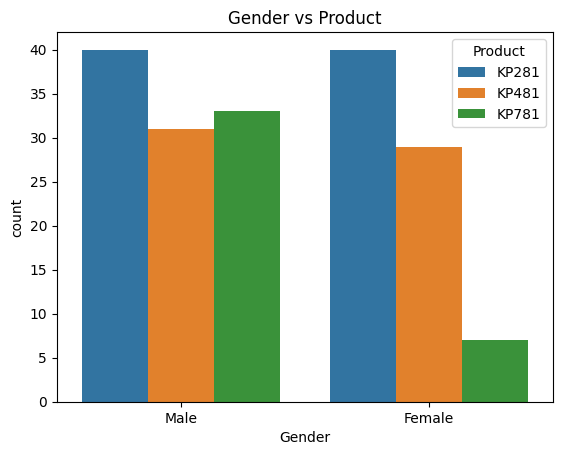

In [158]:
sns.countplot(x=df['Gender'],hue=df['Product'])
plt.title('Gender vs Product')
plt.show()

**Insights:**

* Both male and female individuals are likely to prefer **KP281**.

* There is a slight difference in the usage of Product  **KP481** between male and female individuals.

* There is a significant disparity in the usage of Product **KP781** between male and female individuals.














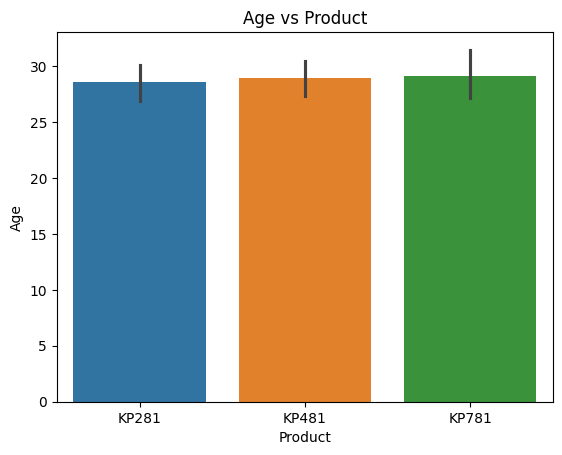

In [159]:
sns.barplot(x=df['Product'],y=df['Age'] ,hue=df['Product'],data=df)
plt.title('Age vs Product')
plt.show()

##Find if there is any relationship between the continuous variables and the output variable in the data.

In [160]:
df1 = df[['Age','Income','Miles',"Usage"]]

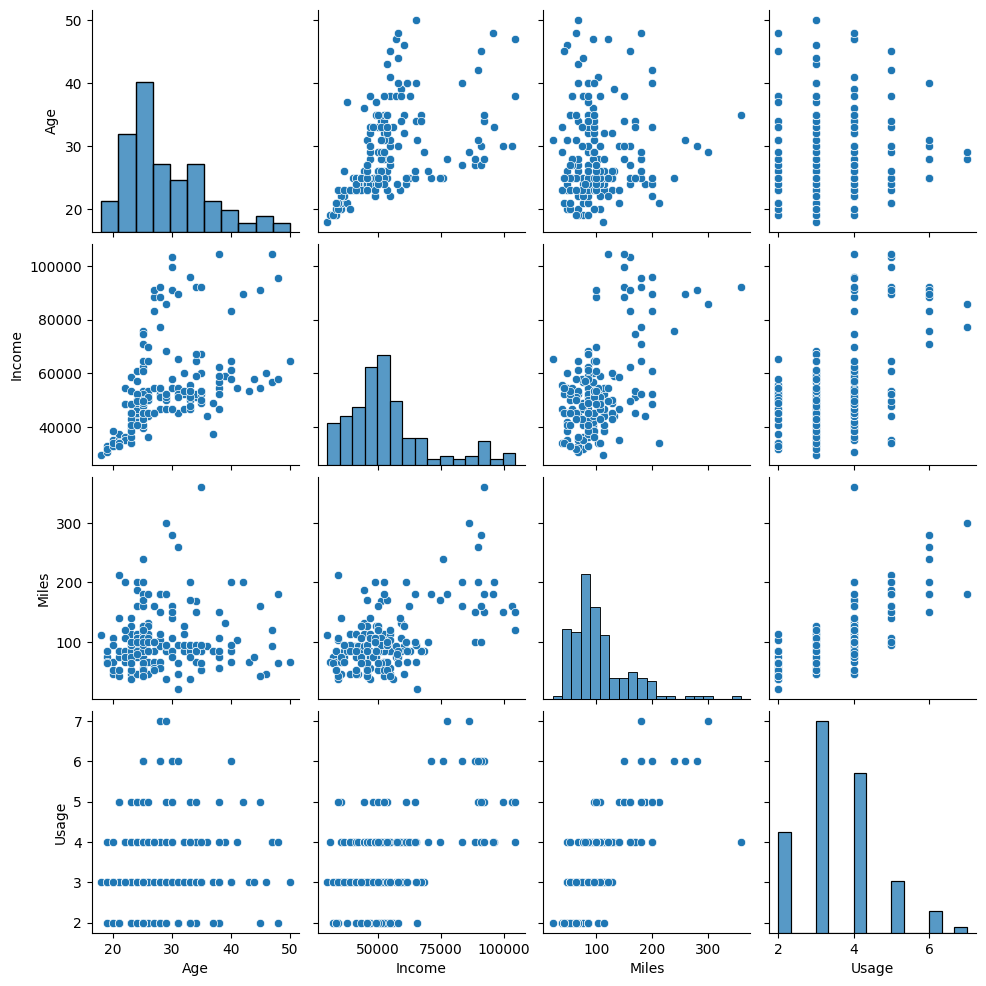

In [161]:
sns.pairplot(df1)
plt.show()

**Insights:**

* **Age and income** postive correlation. As the age is increasing income is also increasing
* **Income and miles** are also positively correlated. As the income is increasing miles are also increasing

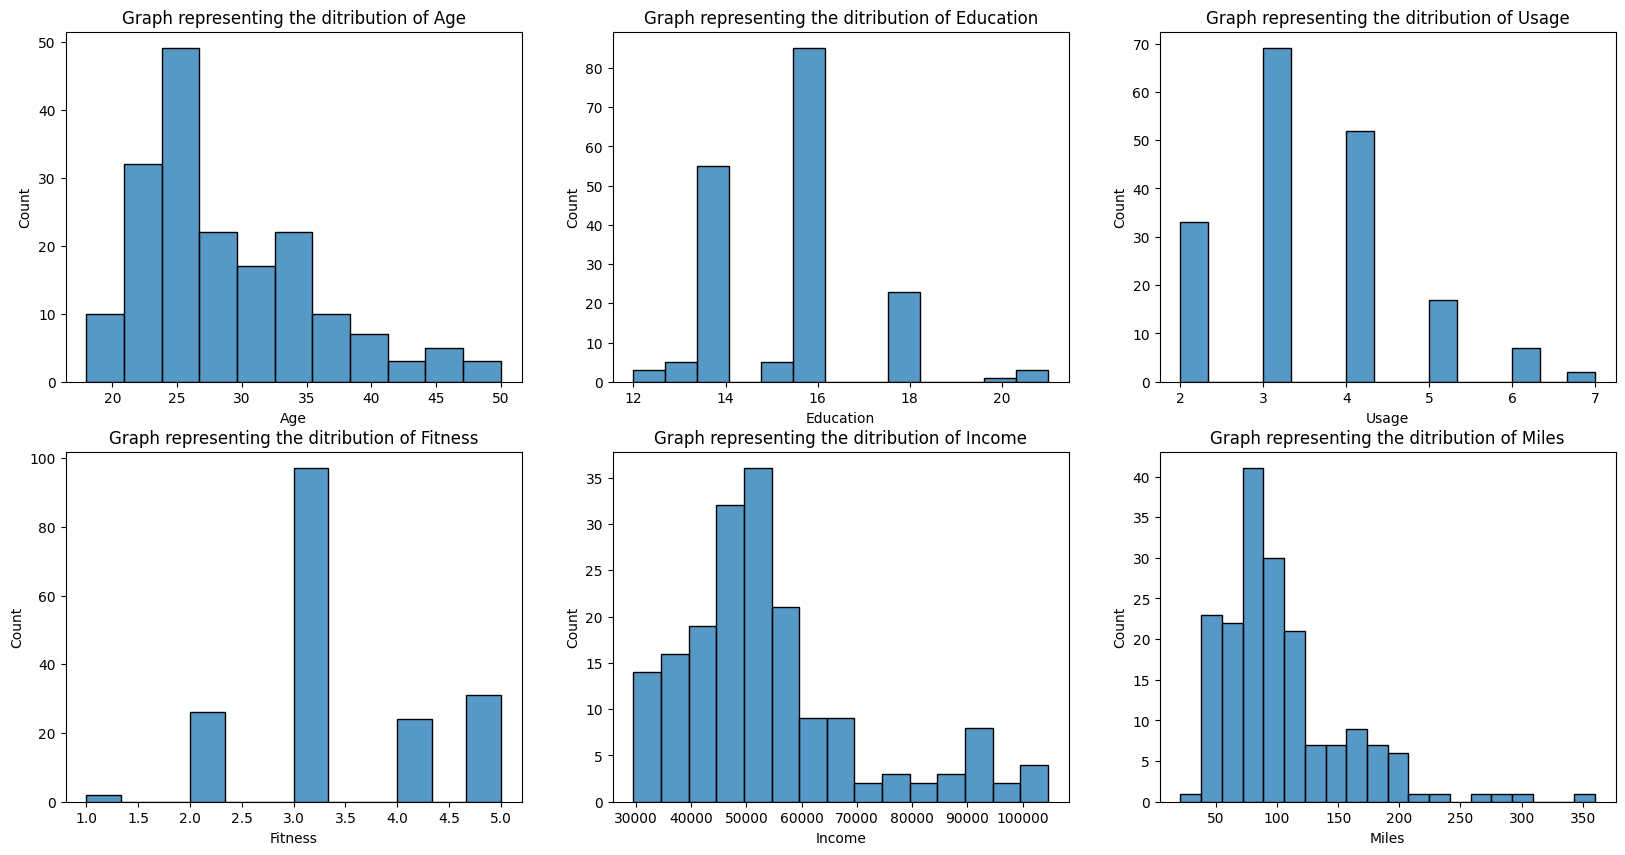

In [162]:
#checking if the data is normally distributed in the  Age,Education,Usage,Fitness,Income,Miles using Boxplot.
fig = plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.histplot(df['Age'])
plt.title('Graph representing the ditribution of Age')

plt.subplot(2,3,2)
sns.histplot(df['Education'])
plt.title('Graph representing the ditribution of Education')

plt.subplot(2,3,3)
sns.histplot(df['Usage'])
plt.title('Graph representing the ditribution of Usage')


plt.subplot(2,3,4)
sns.histplot(df['Fitness'])
plt.title('Graph representing the ditribution of Fitness')


plt.subplot(2,3,5)
sns.histplot(df['Income'])
plt.title('Graph representing the ditribution of Income')


plt.subplot(2,3,6)
sns.histplot(df['Miles'])
plt.title('Graph representing the ditribution of Miles')
plt.show()

**Insights:**

* Most of the users are around 25 years of age, having 16 years of education with around $50000 of annual income.
* Majority of the users have fitness of level 3, use the treadmill 3 times a week and walk/run around 90 miles each week

#4. Representing the Probability

##Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

In [163]:
# Calculate marginal probabilities for 'Treadmill Models'
marginal_probability_product = (df['Product'].value_counts() / len(df['Product'])
        ).reset_index(name='Probability').round(2)

print('Marginal Probability of Treadmill Models')
print(marginal_probability_product)

Marginal Probability of Treadmill Models
  Product  Probability
0   KP281         0.44
1   KP481         0.33
2   KP781         0.22


##Find the probability that the customer buys a product based on each column.

In [164]:
gender_vs_product=pd.crosstab(df['Product'],df['Gender'],margins=True,margins_name='Total')
gender_vs_product

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


In [165]:
# Probability that customer is Male  likely to purchase any product
print('Probability % (Product | Male)')
#KP281
print('KP281 :',np.round((40/104)*100,2))
#KP481
print('KP481 :',np.round((31/104)*100,2))
#KP781
print('KP781 :',np.round((33/104)*100,2))

print('*'*100)

# Probability that customer is female  likely to purchase any product
print('Probability % (Product | Female)')
#KP281
print('KP281 :',round((40/76)*100,2))
#KP481
print('KP281 :',round((29/76)*100,2))
#KP781
print('KP281 :',round((7/76)*100,2))

Probability % (Product | Male)
KP281 : 38.46
KP481 : 29.81
KP781 : 31.73
****************************************************************************************************
Probability % (Product | Female)
KP281 : 52.63
KP281 : 38.16
KP281 : 9.21


In [166]:
maritalstaus_vs_product=pd.crosstab(df['Product'],df['MaritalStatus'],margins=True,margins_name='Total')
maritalstaus_vs_product

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
Total,107,73,180


In [167]:
# Probability that customer is Partnered  likely to purchase any product
print('Probability % (Product | Partnered)')
#KP281
print('KP281 :',round((48/107)*100,2))
#KP481
print('KP481 :',round((36/107)*100,2))
#KP781
print('KP781 :',round((23/107)*100,2))

print('*'*100)

# Probability that customer is single  likely to purchase any product
print('Probability % (Product | Single)')
#KP281
print('KP281 :',round((32/73)*100,2))
#KP481
print('KP281 :',round((24/73)*100,2))
#KP781
print('KP281 :',round((17/73)*100,2))

Probability % (Product | Partnered)
KP281 : 44.86
KP481 : 33.64
KP781 : 21.5
****************************************************************************************************
Probability % (Product | Single)
KP281 : 43.84
KP281 : 32.88
KP281 : 23.29


In [168]:
df.groupby(['Gender','MaritalStatus','Product']).size()

Gender  MaritalStatus  Product
Female  Partnered      KP281      27
                       KP481      15
                       KP781       4
        Single         KP281      13
                       KP481      14
                       KP781       3
Male    Partnered      KP281      21
                       KP481      21
                       KP781      19
        Single         KP281      19
                       KP481      10
                       KP781      14
dtype: int64

In [169]:
def gender_marital_status(x):
  # print(x)
  if x['Gender']=="Male":
    if x['MaritalStatus']=="Partnered":
      return "Partenered Male"
    else:
      return "Single Male"
  else:
    if x['MaritalStatus']=="Partnered":
      return "Partenered Female"
    else:
      return "Single Female"

df['gender_marital_status']=df[["Gender",'MaritalStatus']].apply(gender_marital_status,axis=1)
df[['gender_marital_status','Product']].groupby('gender_marital_status').size()

gender_marital_status
Partenered Female    46
Partenered Male      61
Single Female        30
Single Male          43
dtype: int64

##Find the conditional probability that an event occurs given that another event has occurred.

In [170]:
# Probability that customer is Female and Partnered likely to any product
print('Probability % (Product | female & Partnered)')

#1. KP281
print('KP281 :',round((27/46)*100,2))
#2. KP481
print('KP481 :',round((15/46)*100,2))
#3. KP781
print('KP781 :',round((4/46)*100,2))

print('*'*100)

# Probability that customer is Male and Partnered likely to any product
print('Probability % (Product | Male & Partnered)')
#1. KP281
print('KP281 : ', round((21/61)*100,2))
#2. KP481
print('KP481 : ',round((21/61)*100,2))
#3. KP781
print('KP781 : ',round((19/61)*100,2))

Probability % (Product | female & Partnered)
KP281 : 58.7
KP481 : 32.61
KP781 : 8.7
****************************************************************************************************
Probability % (Product | Male & Partnered)
KP281 :  34.43
KP481 :  34.43
KP781 :  31.15


In [171]:
# Probability that customer is FeMale and single likely to any product
print('Probability % (Product | Female & Single)')
#1. KP281
print('KP281 : ',round((13/30)*100,2))
#2. KP481
print('KP481 : ',round((14/30)*100,2))
#3. KP781
print('KP781 : ',round((3/30)*100,2))

print('*'*100)

# Probability that customer is Male and single likely to any product
print('Probability % (Product | Male & Single)')
#1. KP281
print('KP281 : ', round((19/43)*100,2))
#2. KP481
print('KP481 : ',round((10/43)*100,2))
#3. KP781
print('KP781 : ',round((14/43)*100,2))

Probability % (Product | Female & Single)
KP281 :  43.33
KP481 :  46.67
KP781 :  10.0
****************************************************************************************************
Probability % (Product | Male & Single)
KP281 :  44.19
KP481 :  23.26
KP781 :  32.56


#Categorizing the data

In [172]:
def age_category(age):
    if age >= 10 and age <= 20:
        return '10-20'
    elif age > 20 and age <= 30:
        return '20-30'
    elif age > 30 and age <=40:
        return '30-40'
    else:
        return '40-50'
df['age_category'] = df['Age'].apply(age_category)
pd.crosstab(df['Product'],df['age_category'],margins=True,margins_name='Total')

age_category,10-20,20-30,30-40,40-50,Total
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
Total,10,110,48,12,180


In [173]:
def income_category(x):
    if x < 45000:
        return 'Low Income'
    elif x >= 45000 and x < 65000:
        return 'Average Income'
    else:
        return 'High Income'
df['income_category'] = df["Income"].apply(income_category)
pd.crosstab(df['Product'],df['income_category'],margins=True,margins_name='Total')

income_category,Average Income,High Income,Low Income,Total
Product,,,,
KP281,44,2,34,80
KP481,43,2,15,60
KP781,16,24,0,40
Total,103,28,49,180


In [174]:
def fitness_category(x):
    if  x <= 2:
        return 'Poor Fitness'
    if x == 3:
        return 'Fair Fitness'
    else:
        return 'Excellent Fitness'
df['fitness_category']= df['Fitness'].apply(fitness_category)
pd.crosstab(df['Product'],df['fitness_category'],margins=True,margins_name='Total')

fitness_category,Excellent Fitness,Fair Fitness,Poor Fitness,Total
Product,,,,
KP281,11,54,15,80
KP481,8,39,13,60
KP781,36,4,0,40
Total,55,97,28,180


In [175]:
df.groupby('Product')['Miles'].agg(lambda x:x.mode())

Product
KP281     85
KP481     95
KP781    100
Name: Miles, dtype: int64

In [176]:
pd.crosstab(df['Product'],df['Usage'],margins=True,margins_name='Total')

Usage,2,3,4,5,6,7,Total
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
Total,33,69,52,17,7,2,180


In [177]:
pd.crosstab(df['Product'],df['Education'],margins=True,margins_name='Total')

Education,12,13,14,15,16,18,20,21,Total
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
Total,3,5,55,5,85,23,1,3,180


#5. Check the correlation among different factors

In [178]:
data_dummies = pd.get_dummies(df)

In [179]:
data_dummies=data_dummies.astype('int')

In [180]:
correlation_on_df = data_dummies.loc[:,:'Gender_Male']
correlation_on_df

,Age,Education,Usage,Fitness,Income,Miles,Income_cliped,Usage_cliped,Education_cliped,Miles_cliped,Age_cliped,Product_KP281,Product_KP481,Product_KP781,Gender_Female,Gender_Male
0,18,14,3,4,29562,112,34053,3,14,112,20,1,0,0,0,1
1,19,15,2,3,31836,75,34053,2,15,75,20,1,0,0,0,1
2,19,14,4,3,30699,66,34053,4,14,66,20,1,0,0,1,0
3,19,12,3,3,32973,85,34053,3,14,85,20,1,0,0,0,1
4,20,13,4,2,35247,47,35247,4,14,47,20,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,21,6,5,83416,200,83416,5,18,200,40,0,0,1,0,1
176,42,18,5,4,89641,200,89641,5,18,200,42,0,0,1,0,1
177,45,16,5,5,90886,160,90886,5,16,160,43,0,0,1,0,1
178,47,18,4,5,104581,120,90948,4,18,120,43,0,0,1,0,1


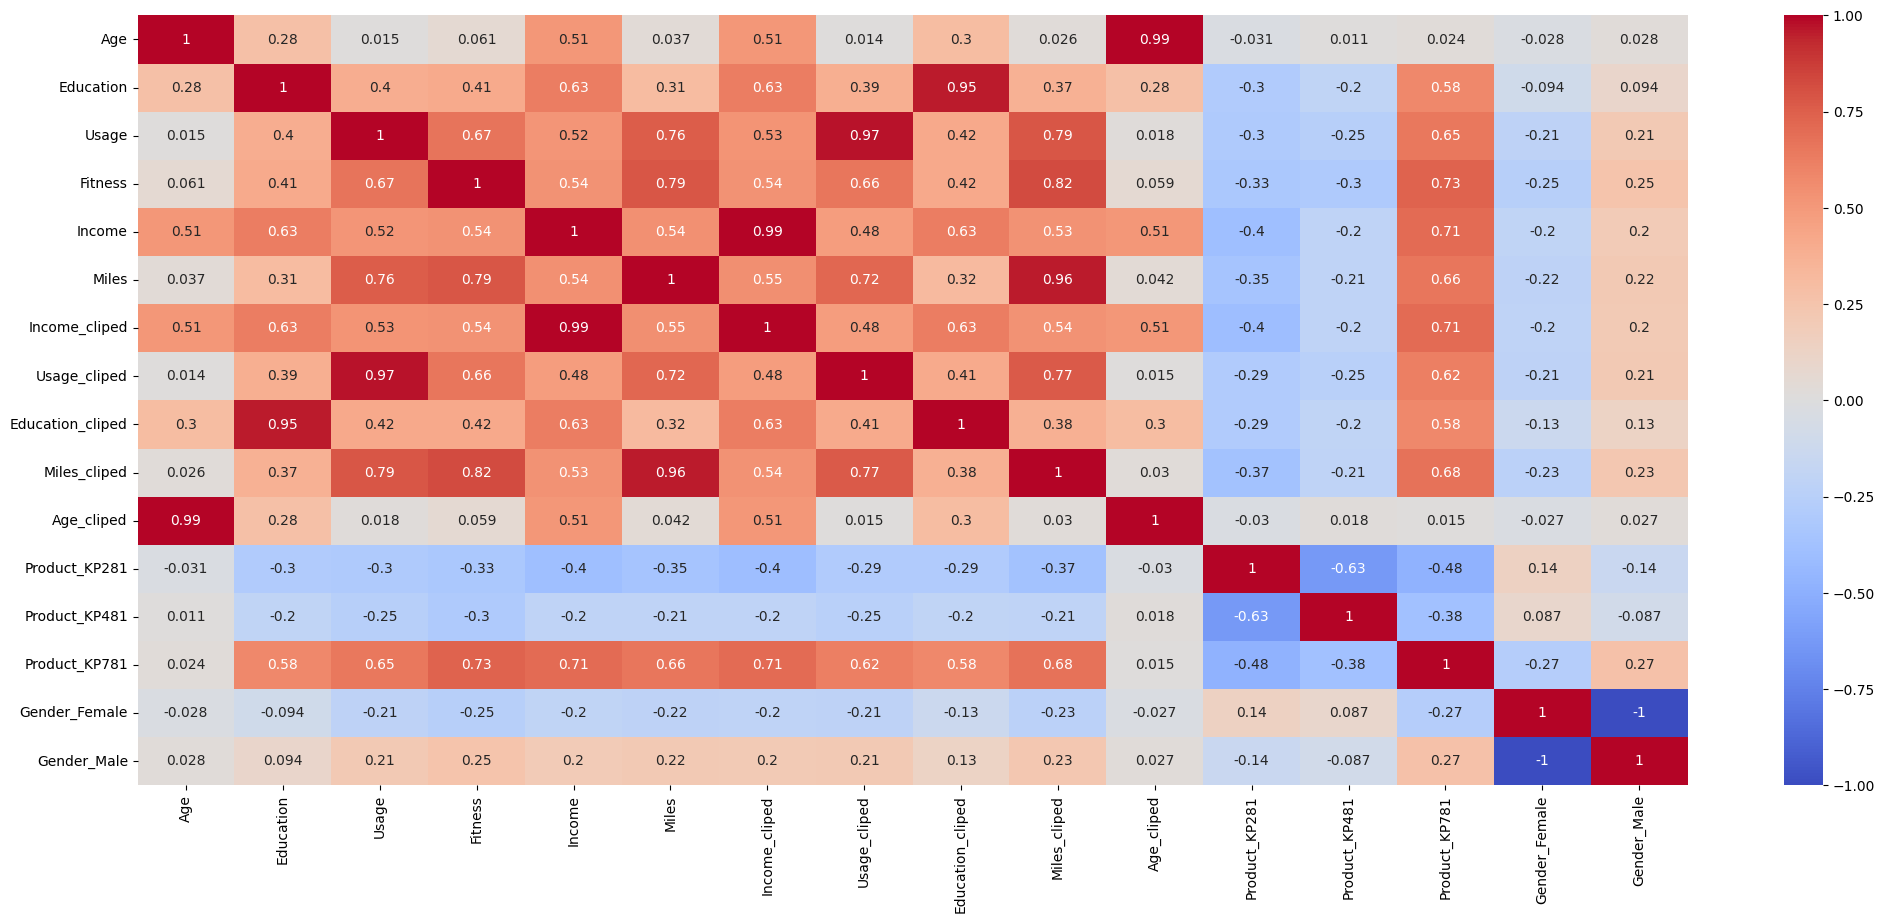

In [181]:
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_on_df.corr(), annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.yticks(rotation=0);

**Insights:**

* **Male** users display positive correlations with KP781 but negative correlations with other products, whereas **female** users exhibit positive correlations with KP281 and KP481 but negative correlations with KP781.

* The variables **Fitness, Income, Miles, and Usage** are highly positively correlated with KP781, while showing negative correlations with both KP281 and KP481.

#6. Customer profiling and recommendation

##Make customer profilings for each and every product.

**KP281**

* Age : Around 20-30
* Income : Category under Low income and Average income
* Fitness: under Fair fitness
* Miles : Under 85
* Usage: 2-4
* Education : less than 16
* Marital Status : Both, but targeted more towards Partnered
* Gender: Both

**KP481**

* Age : Around 20-30
* Income : Category under Low income and Average income
* Fitness: under Fair fitness
* Miles : Under 95
* Usage: 2-4
* Education : less than 16
* Marital Status : Both, but targeted more towards Partnered
* Gender: Both,but targeted more towards Male

**KP781**

* Age : Around 30
* Income : Category under Average income and High income
* Fitness: under Excellent fitness
* Miles : Under 200
* Usage: 4-5
* Education : 16-18
* Marital Status : Both, but targeted more towards Partnered
* Gender: Male



---



# Business Insights:

* If customer is **Male and Single**,Probability of Buying **KP781** increased from **22.22% to 32.56%**.

* If customer is **Female and Partnered**,Probability of Buying **KP281** increased from **44.44% to 58.7%**.

* If customer is *Female and Partnered*,Probability of Buying **KP781** decreased from **22.22% to 8.7%**.

* **57.78%** Customers are **Male**and  **59.44%** Customers are **Partnered**.

* Most sold product **KP281**, its 44.44% of sales out of overall Aerofit Treadmill sale.




---



##Write a detailed recommendation from the analysis that you have done.

* Implementing gamification for the fitness score is recommended as it is anticipated to boost usage.

* Products are specifically targeted to particular customer through advertising on social media and e-commerce platforms.

* Based on observations, the KP281 product has the highest sales, followed by similar features found in KP481. To make it more accessible, offering a EMI facility could be considered.

* Aerofit could implement a rewards program to incentivize customers to boost their weekly treadmill usage in terms of both duration and distance covered through walking or running.

* Offer special deals or discounts to attract customers seeking a more budget-friendly choice.
















